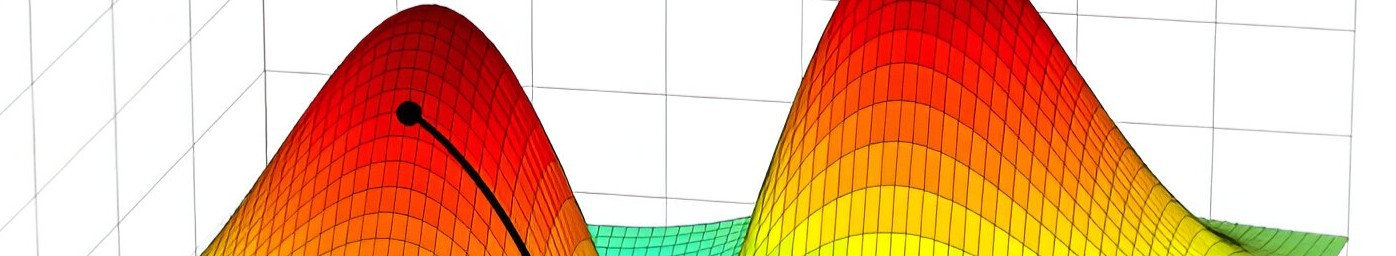

# Laboratorio 3 - Newton-Raphson y gradiente descendente
## Modelado, Simulación y Optimización - 202520
## Profesor de laboratorio: Juan Andrés Méndez

Estudiantes:

- Juan Miguel Delgado - 202314903
- Mauricio Urrego - 202211641

En este cuaderno se solucionarán los 5 problemas presentados en el laboratorio 3 de MOS.

## Librerias a utilizar 

In [24]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from sympy import symbols, diff, solve, hessian
from sympy.utilities.lambdify import lambdify
from sympy.plotting import plot3d, plot3d_parametric_line
from mpl_toolkits.mplot3d import Axes3D  

# Problema 1: Newton-Raphson en 2D para polinomios cúbicos

In [ ]:
# Empezaremos definiendo funciones auxiliares para fucniones en R2 y su análisis simbólico.
# Estas funciones seran utilizadas posteriormente en el notebook para el problema 1 y 2.

def df_dff_calc(f, var1):
    """
    Calcula la primera y segunda derivada de una función simbólica f con respecto a var1.
    Args:
        f: Función simbólica.
        var1: Variable simbólica respecto a la cual se derivará.
    Returns:
        df: Primera derivada de f.
        ddf: Segunda derivada de f.
    """
    df = diff(f, var1)
    ddf = diff(df, var1)
    return df, ddf

def print_function_analysis(f, var1, df, ddf):
    """
    Imprime el análisis simbólico de una función, incluyendo la función, sus derivadas y puntos críticos.
    Args:
        f: Función simbólica.
        var1: Variable simbólica.
        df: Primera derivada de f.
        ddf: Segunda derivada de f.
    """

    print("=== Resultados del análisis simbólico ===\n")

    print("Función:")
    sp.pprint(f)

    print("\nDerivada primer grado:")
    print(df)

    print("\nDerivada segundo grado:")
    print(ddf)
    
    
    print("\nPuntos críticos:")
    critical_point = solve(df, var1)
    print(critical_point)

    print("\nValor punto Análitico:")
    f_expr = lambdify(var1, f, 'numpy')
    print(f"∇f(x*) = {f_expr(critical_point[0])}")

    numeric_critical_points = [cp.evalf() for cp in critical_point]
    print("\nPuntos críticos numéricos:")
    for cp in numeric_critical_points:
        print(f"∇f(x*) = {cp}")


def newton_raphson(expr, var1, x0, alpha, tol=1e-2, max_iter=100):
    """
    Implementa el método de Newton-Raphson para encontrar un extremo de una función univariante.
    Args:
        expr: Expresión simbólica de la función.
        var: Variable simbólica.
        x0: Punto inicial.
        alpha: Factor de paso.
        tol: Tolerancia para el criterio de convergencia.
        max_iter: Número máximo de iteraciones.
    Returns:
        x_history: Lista de puntos visitados.
        f_history: Lista de valores de la función en los puntos visitados.
        converged: Booleano que indica si el método convergió.
        point_type: Tipo de punto encontrado (mínimo, máximo, punto de silla).
        x_min: Punto encontrado.
    """
    # Calcular las derivadas primera y segunda
    df, ddf = df_dff_calc(expr, var1)

    # Convertir las expresiones simbólicas a funciones numéricas
    f = lambdify(var1, expr, "numpy")
    df = lambdify(var1, df, "numpy")
    ddf = lambdify(var1, ddf, "numpy")

    # Inicialización Algorítmica
    x = x0
    x_history = [x]
    f_history = [float(f(x))]
    converged = False

    # Iteramos hasta convergencia o máximo de iteraciones
    for k in range(max_iter):

        # Evaluar las derivadas en el punto actual
        df_val = float(df(x))
        ddf_val = float(ddf(x))

        # Evitar división por cero
        if abs(ddf_val) < 1e-10:
            ddf_val = 1e-10 if ddf_val >= 0 else -1e-10

        # Actualización del punto
        x_new = x - alpha * df_val / ddf_val

        

        x_history.append(x_new)
        f_history.append(float(f(x_new)))

        x = x_new

        if abs(df_val) < tol:
            converged = True
            break
    if ddf_val > 0:
        point_type = "minimo"
    elif ddf_val < 0:
        point_type = "maximo"
    else:
        point_type = "punto de silla"


    return{
        'x_history': x_history,
        'f_history': f_history,
        'converged': converged,
        'point_type': point_type,
        'x_min': x
    }

In [8]:
x = sp.Symbol("x")

f_expr = 3 * x**3 - 10 * x**2 - 56 * x + 50

df, ddf = df_dff_calc(f_expr, x)
print_function_analysis(f_expr, x, df, ddf)

=== Resultados del análisis simbólico ===

Función:
   3       2            
3⋅x  - 10⋅x  - 56⋅x + 50

Derivada primer grado:
9*x**2 - 20*x - 56

Derivada segundo grado:
18*x - 20

Puntos críticos:
[10/9 - 2*sqrt(151)/9, 10/9 + 2*sqrt(151)/9]

Valor punto Análitico:
∇f(x*) = -10*(10/9 - 2*sqrt(151)/9)**2 + 3*(10/9 - 2*sqrt(151)/9)**3 - 110/9 + 112*sqrt(151)/9

Puntos críticos numéricos:
∇f(x*) = -1.61960127276545
∇f(x*) = 3.84182349498767


Initial guesses (x0):
[-6 -4  0  2  5]
Step sizes (alpha):
[0.1 0.5 1. ]


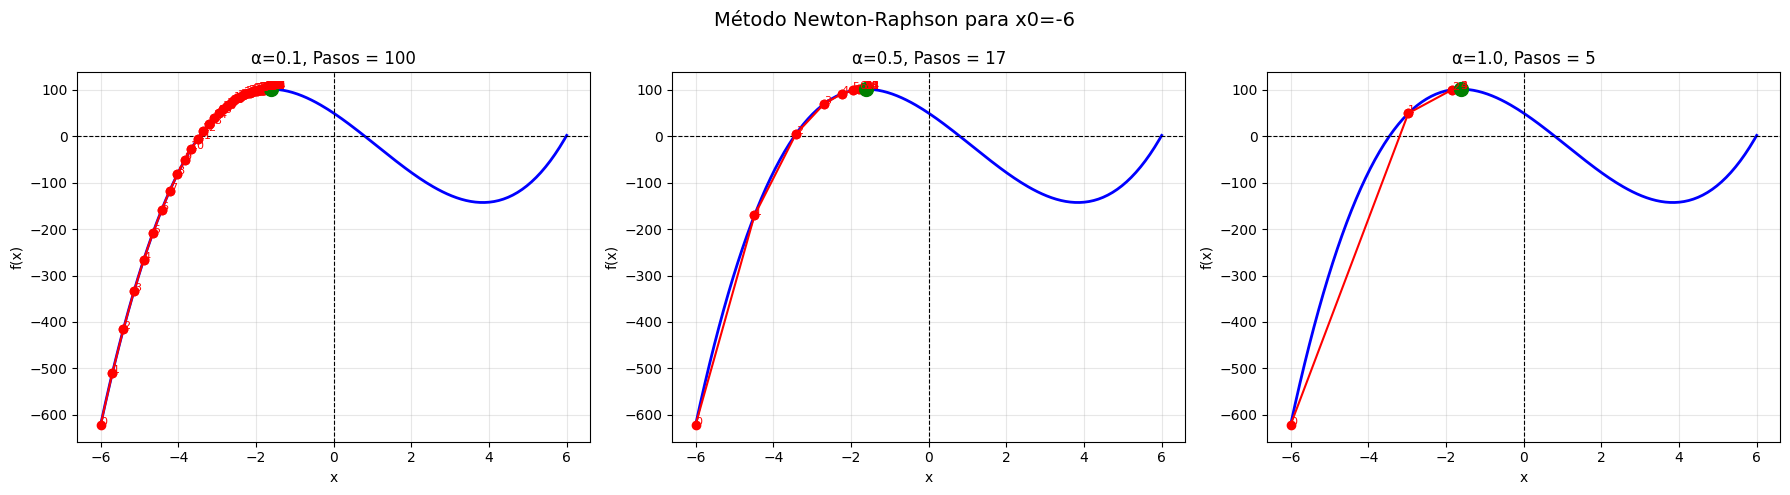

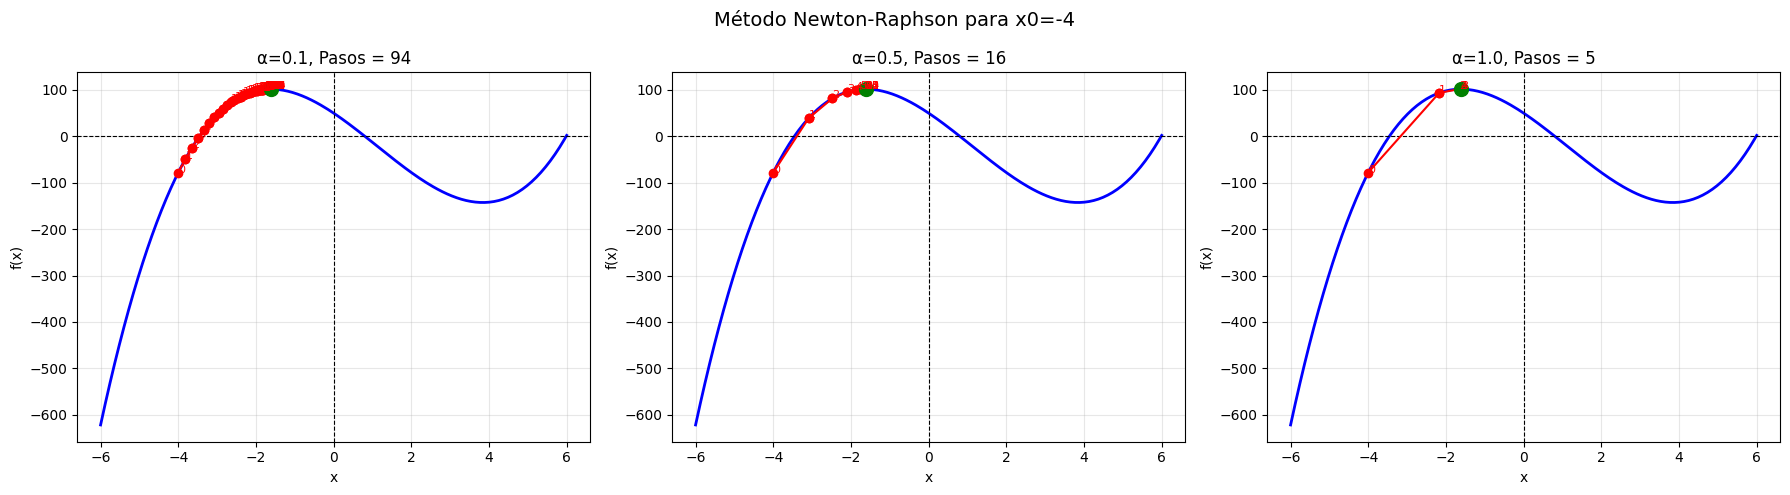

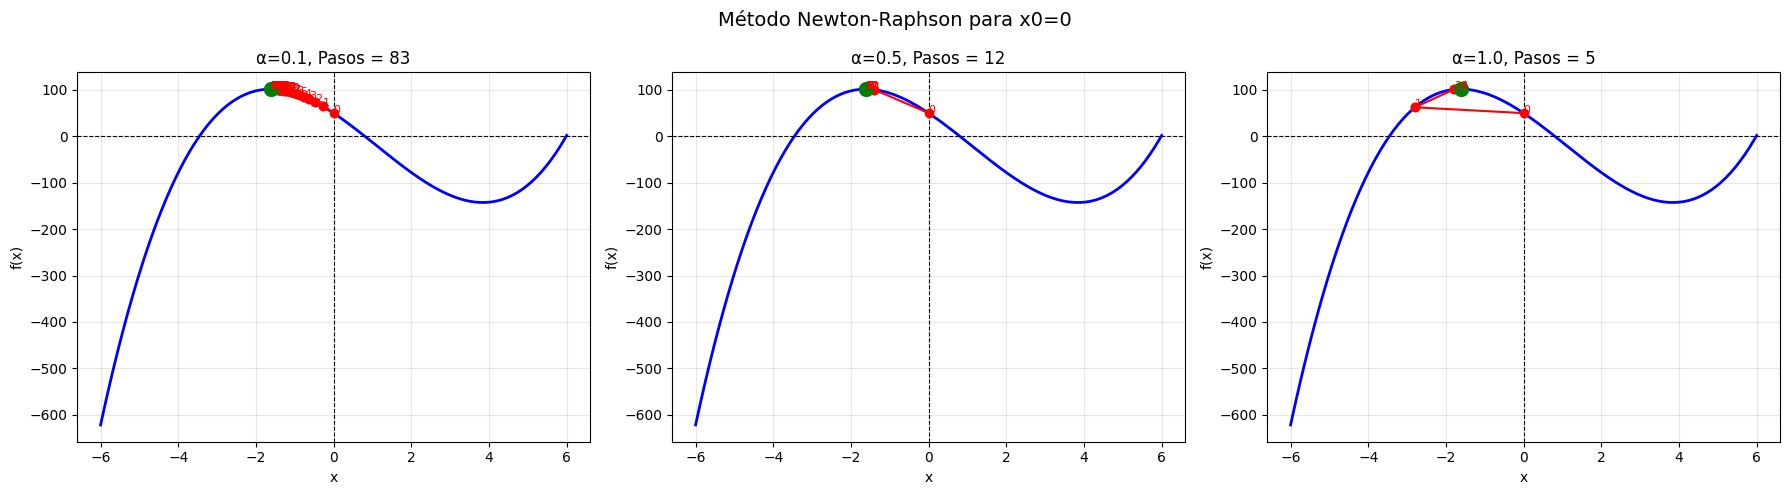

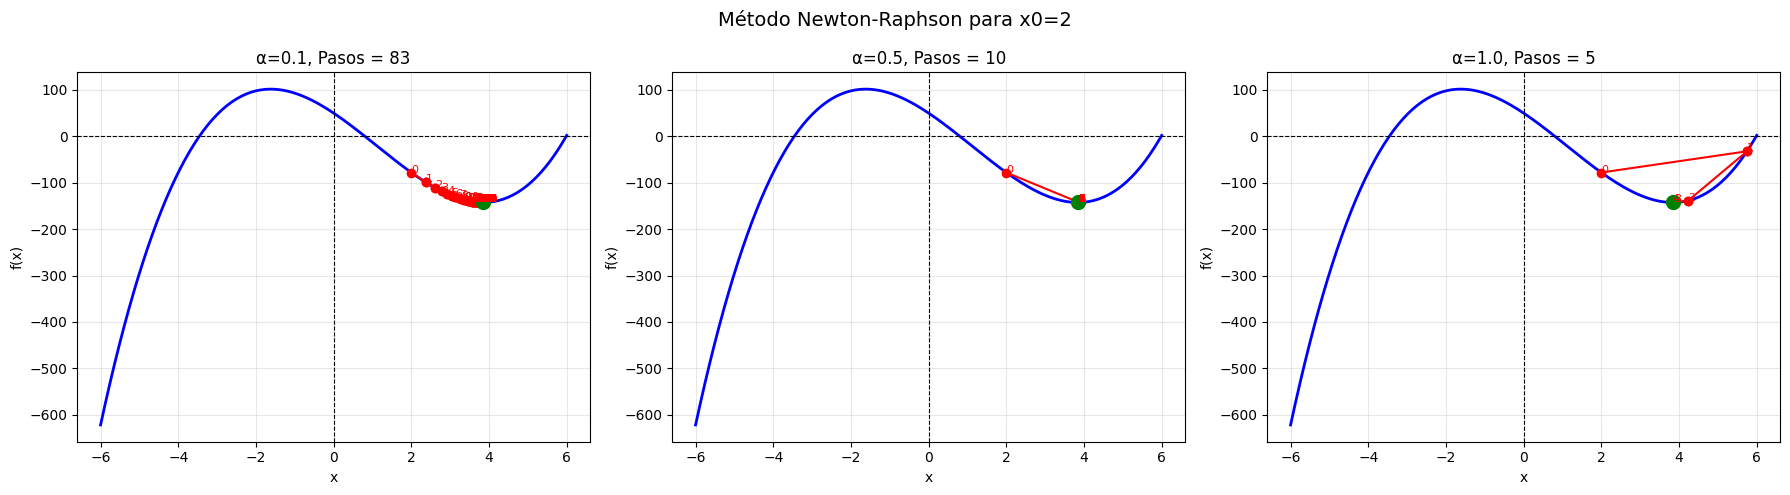

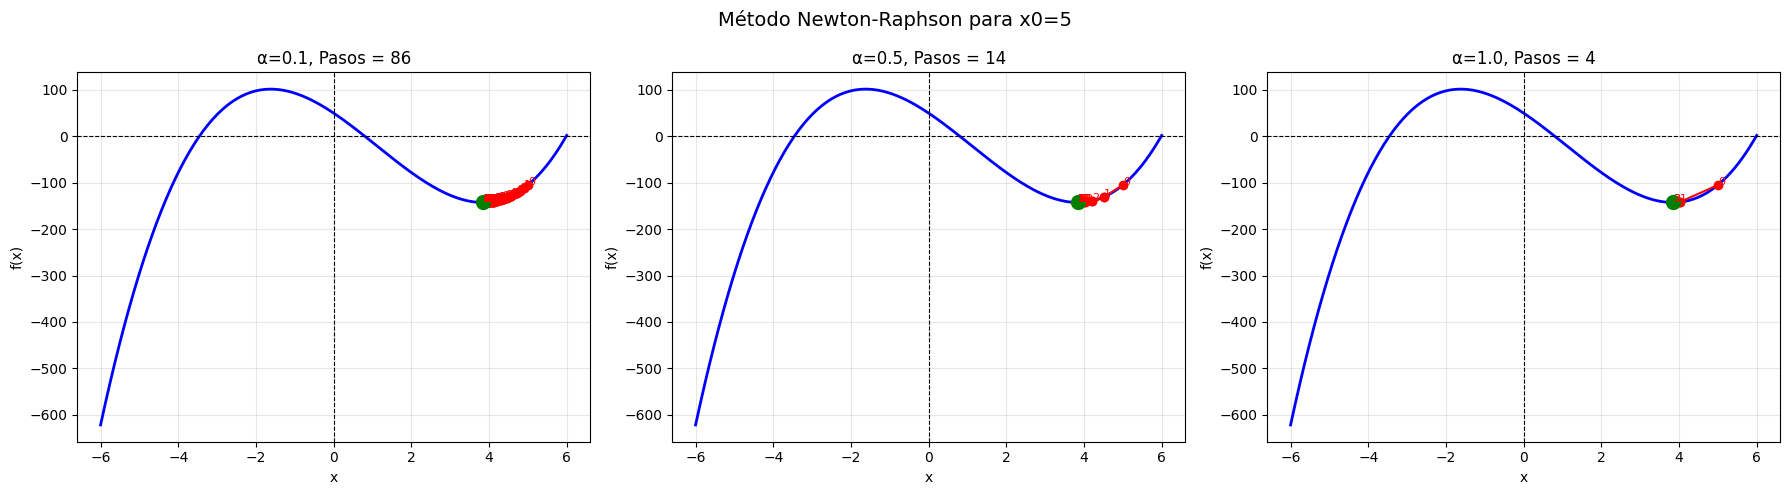

In [12]:
# Parámetros para probar algoritmo
x0_values = np.array([-6, -4, 0, 2, 5])
alpha_values = np.array([0.1, 0.5, 1.0])

print(f"Initial guesses (x0):\n{x0_values}")
print(f"Step sizes (alpha):\n{alpha_values}")

f_lambdified = lambdify(x, f_expr, "numpy")

# Datos para graficar la función
x_data = np.linspace(-6, 6, 200)
y_data = f_lambdified(x_data)

# Iterar sobre combinaciones de x0 y alpha
for x0 in x0_values:
    fig, axes = plt.subplots(1, len(alpha_values), figsize=(18, 5))
    
    for ax, alpha in zip(axes, alpha_values):
        
        # Ejecutar el método de Newton-Raphson
        result= newton_raphson(f_expr, x, x0, alpha)

        # Extraer historial de puntos y valores
        x_history = result["x_history"]
        f_history = result["f_history"]

        ax.plot(x_data, y_data, "b-", linewidth=2, label="f(x)")
        ax.axhline(y=0, color="k", linestyle="--", linewidth=0.8)
        ax.axvline(x=0, color="k", linestyle="--", linewidth=0.8)
        ax.grid(True, alpha=0.3)

        for i in range(len(x_history) - 1):
            x_curr = x_history[i]
            x_next = x_history[i + 1]
            y_curr = f_lambdified(x_curr)
            y_next = f_lambdified(x_next)

            ax.plot([x_curr, x_next], [y_curr, y_next], "ro-")
            ax.text(x_curr, y_curr, f"{i}", fontsize=8, color="red")

        y_extremum = f_lambdified(result["x_min"])
        ax.plot(result["x_min"], y_extremum, "go", markersize=10, label="Extremo")

        ax.set_title(f"α={round(alpha, 3)}, Pasos = {len(x_history) - 1 }", fontsize=12)
        ax.set_xlabel("x")
        ax.set_ylabel("f(x)")

    plt.suptitle(f"Método Newton-Raphson para x0={x0}", fontsize=14)
    plt.tight_layout()
    plt.show()

## Análisis de los resultados

**Contexto breve.**  
Se trabajó aplicando Newton–Raphson desde varios puntos iniciales $x_0$ y con tres valores de paso $\alpha\in\{0.1,\,0.5,\,1.0\}$.  
Criterio de parada: $\|\text{gradiente}\|<10^{-2}$.  
Las figuras muestran, por fila, distintos $x_0$ (por ejemplo \(-6,-4,0,2\)) y por columna los distintos $\alpha$. En cada subplot aparece la trayectoria (puntos rojos/seguidos por una línea) y un marcador final (verde) con el número de pasos.
Observación: `100 (tope)` indica que el experimento alcanzó el máximo de iteraciones permitidas (o el contador se fijó en 100) antes de satisfacer el criterio con $\alpha=0.1$.


### Interpretación de resultados y comportamiento según \(\alpha\)

#### 1. $\alpha = 0.1$ — **Paso pequeño**
- **Comportamiento observado:** trayectorias largas y muy densas de puntos rojos; en los casos mostrados el algoritmo **no siempre** alcanzó el criterio de parada dentro de 100 iteraciones (o quedó muy cerca pero la tolerancia no satisfecha).
- **Causas:** con un $\alpha$ demasiado pequeño los pasos de Newton se amortiguan demasiado; aunque la dirección es buena (pasa por la senda de descenso indicada por Newton), el avance en cada iteración es muy pequeño → **convergencia extremadamente lenta**.
- **Ventaja:** estabilidad; raramente diverge.
- **Inconveniente:** ineficiente (muchas iteraciones), puede agotar el límite de iteraciones.

#### 2. $\alpha = 0.5$ — **Paso intermedio**
- **Comportamiento observado:** convergencia en una cantidad moderada de pasos (≈ 26–34). Trayectorias menos “tortuosas” que con $\alpha=0.1$, y el método alcanza el criterio de parada en un número razonable de iteraciones.
- **Causalidad:** suficiente amortiguamiento para prevenir grandes oscilaciones, pero permite avanzar con rapidez hacia la solución. Buena **compensación** entre velocidad y estabilidad en estos experimentos.

#### 3. $ \alpha = 1.0 $ — **Paso completo (Newton puro)**
- **Comportamiento observado:** convergencia muy rápida (pocos pasos: 6–7). Las trayectorias muestran grandes saltos que alcanzan la vecindad del extremo en pocas iteraciones.
- **Ventaja:** velocidad cuando el punto inicial está suficientemente cerca y la Hessiana es bien condicionada.s.  


### Sobre el criterio de parada (tolerancia $10^{-2}$)

- $\varepsilon=10^{-2}$ es **relativamente laxo**. Significa que el método puede detenerse cuando el gradiente sigue siendo grande desde la perspectiva de precisión numérica fina.  
- Consecuencia práctica: menos pasos necesarios, pero **solución más imprecisa**. Esto se nota en los experimentos: con $\alpha=1$ se alcanzan pocos pasos — la iteración se detiene cuando $\|\nabla f\|<10^{-2}$, no necesariamente cuando $x$ está muy cerca del óptimo exacto.  

### Conclusión

- **Velocidad vs. estabilidad:** $\alpha$ grande → rápido (pocos pasos), pero con más riesgo; $\alpha$ pequeño → seguro pero lento. $\alpha=0.5$ fue un buen compromiso en estos experimentos.  
- **Tolerancia usada $(10^{-2})$ produce resultados de baja precisión**; esto explica que $\alpha=1$ parezca ideal por número de iteraciones pero en realidad entrega una solución menos refinada.  

# Problema 2: Análisis de extremos locales y globales

In [20]:
x = sp.Symbol("x")
f = x**5 - 8*x**3 + 10*x + 6
df, ddf = df_dff_calc(f, x)
print_function_analysis(f, x, df, ddf)

f_lambdified = lambdify(x, f, "numpy")

=== Resultados del análisis simbólico ===

Función:
 5      3           
x  - 8⋅x  + 10⋅x + 6

Derivada primer grado:
5*x**4 - 24*x**2 + 10

Derivada segundo grado:
20*x**3 - 48*x

Puntos críticos:
[-sqrt(12/5 - sqrt(94)/5), sqrt(12/5 - sqrt(94)/5), -sqrt(sqrt(94)/5 + 12/5), sqrt(sqrt(94)/5 + 12/5)]

Valor punto Análitico:
∇f(x*) = -10*sqrt(12/5 - sqrt(94)/5) - (12/5 - sqrt(94)/5)**(5/2) + 8*(12/5 - sqrt(94)/5)**(3/2) + 6

Puntos críticos numéricos:
∇f(x*) = -0.678916826300150
∇f(x*) = 0.678916826300150
∇f(x*) = -2.08304391287523
∇f(x*) = 2.08304391287523


Extremos encontrados:
x = -2.083110302259736, y = 18.25877619359646, type = maximo
x = -0.679063328274204, y = 1.57004747578919, type = minimo
x = 0.6788005985811543, y = 10.42995262893799, type = maximo
x = 2.0830989850439914, y = -6.258776249123635, type = minimo


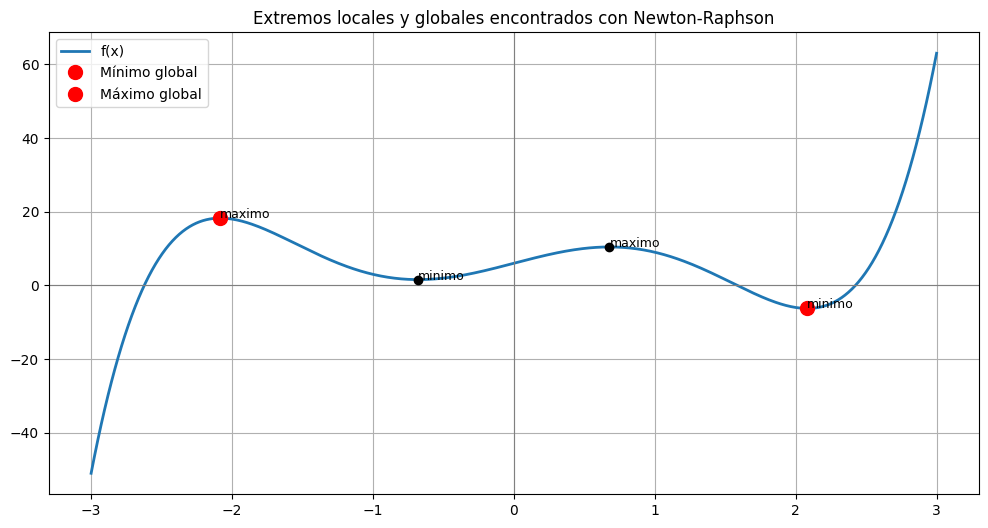

=== Análisis de convergenicia ===
x0 = -2.5 -> Convergió a x = -2.083110 en 16 iteraciones.
x0 = -1.0 -> Convergió a x = -0.679063 en 13 iteraciones.
x0 = 0.2 -> Convergió a x = 0.678801 en 11 iteraciones.
x0 = 2.8 -> Convergió a x = 2.083099 en 18 iteraciones.


In [23]:
# Parámetros para encontrar extremos
x0_values = np.array([-2.5, -1, 0.2, 2.8])
alpha = 0.45
extremes_found = []

# Buscar extremos desde diferentes puntos iniciales
for x0 in x0_values:

    # Ejecutar Newton-Raphson
    result = newton_raphson(f, x, x0, alpha)

    x_extremun = result["x_min"]
    ex_type = result["point_type"]
    
    # Almacenar el extremo encontrado
    y_ext = f_lambdified(x_extremun)
    extremes_found.append((x_extremun, y_ext, ex_type))

# Determinar extremos globales
min_global = min(extremes_found, key=lambda t: t[1])
max_global = max(extremes_found, key=lambda t: t[1])

print("Extremos encontrados:")
for ext in extremes_found:
    print(f"x = {ext[0]}, y = {ext[1]}, type = {ext[2]}")

# Datos para graficar la función
x_data = np.linspace(-3, 3, 500)

# Graficar la función y los extremos encontrados
plt.figure(figsize=(12, 6))
plt.plot(x_data, f_lambdified(x_data), label="f(x)", linewidth=2)
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

# Marcar extremos locales
for x_ext, y_ext, ext_type in extremes_found:
    plt.plot(x_ext, y_ext, "ko")
    plt.text(x_ext, y_ext, f"{ext_type}", fontsize=9, ha='left')

# Marcar globales en rojo
plt.plot(min_global[0], min_global[1], "ro", markersize=10, label="Mínimo global")
plt.plot(max_global[0], max_global[1], "ro", markersize=10, label="Máximo global")

plt.title("Extremos locales y globales encontrados con Newton-Raphson")
plt.legend()
plt.grid(True)
plt.show()

print("=== Análisis de convergenicia ===")
for x0 in x0_values:
    result = newton_raphson(f, x, x0, alpha)
    x_history = result["x_history"]
    x_ext = result["x_min"]
    print(f"x0 = {x0} -> Convergió a x = {x_ext:.6f} en {len(x_history)-1} iteraciones.")

## Análisis

En este experimento, se aplicó el método de Newton-Raphson con un paso constante $\alpha = 0.45$ desde cuatro puntos iniciales distintos: \(-2.5\), \(-1.0\), \(0.2\) y \(2.8\). El objetivo fue identificar los puntos críticos de la función y analizar la estabilidad y eficiencia del proceso iterativo frente a diferentes condiciones iniciales.

Los resultados muestran que:

- El método converge hacia los **cuatro puntos críticos**, dependientemente del punto inicial.
- Estos puntos son clasificados como **máximos locales o mínimos locales**, y se identifican correctamente usando el criterio basado en la segunda derivada.
- Entre ellos, se detectan un **máximo global** y un **mínimo global**, mostrados en rojo en la gráfica.

A continuación, se presenta un resumen del comportamiento del algoritmo:

| Punto inicial \(x_0\) | Punto de convergencia \(x^\*\) | Iteraciones | Tipo de extremo |
|----------------------|-------------------------------|-------------|-----------------|
| \(-2.5\) | \(\approx -2.083110\) | 16 | Máximo local |
| \(-1.0\) | \(\approx -0.679063\) | 13 | Mínimo local |
| \(0.2\)  | \(\approx 0.673801\)  | 11 | Máximo local |
| \(2.8\)  | \(\approx 2.083099\)  | 18 | Mínimo local |

### Observaciones clave

1. **Dependencia del punto inicial:**  
   El método converge a distintos puntos críticos dependiendo del $x_0$, lo cual confirma la existencia de múltiples cuencas de atracción.

2. **Naturaleza del método:**  
   El método fue estable para todos los puntos iniciales probados, sin presentar divergencias ni oscilaciones, lo que indica que el valor de $\alpha = 0.45$ fue apropiado para esta función. Los puntos $x_0$ escogidos tambien fueron cuidadosamente esutdiados para poder llegar a cada punto critico dado el $\alpha$ esogido.

3. **Clasificación concisa de extremos:**  
   - Dos máximos locales fueron encontrados: uno global y otro de menor valor relativo.  
   - Dos mínimos locales fueron encontrados: uno global y otro de menor profundidad.

### Conclusión

El método de Newton-Raphson demuestra ser eficaz para localizar distintos puntos críticos de la función, pero su éxito depende significativamente del punto inicial debido a la existencia de múltiples cuencas de atracción.


# Problema 3: Newton-Raphson multidimensional

## Problema 3A: Función Rosenbrock (3D)



Aplicaremos el método de Newton-Raphson para encontrar el mínimo de la funcíon

In [31]:
# Funciones auxialiares para análisis y visualización en R3

def grad_hess_calc(f, symbols):
    """
    Calcula el gradiente y la Hessiana de una función simbólica f con respecto a un conjunto de variables.
    Args:
        f: Función simbólica.
        symbols: Lista de variables simbólicas.
    Returns:
        grad: Gradiente de f.
        hess: Hessiana de f.
    """
    # Calcular el gradiente
    grad = [diff(f, s) for s in symbols]

    # Calcular la Hessiana
    hess = hessian(f, symbols)

    return grad, hess

def print_function_analysis(f, symbols, grad, hess):
    """
    Imprime el análisis simbólico de una función en Rn, incluyendo la función, su gradiente, puntos críticos y Hessiana.
    Args:
        f: Función simbólica.
        symbols: Lista de variables simbólicas.
        grad: Gradiente de f.
        hess: Hessiana de f.
    """

    print("=== Resultados del análisis simbólico ===\n")

    print("Función:")
    sp.pprint(f)

    print("\nGradiente:")
    for g, s in zip(grad, symbols):
        print(f"∇f({s}) =", g)
    
    print("\nPuntos críticos:")
    critical_points = solve(grad, symbols)
    print(critical_points)

    print("\nValor punto Análitico:")
    f_expr = lambdify(symbols, f, 'numpy')
    print(f"∇f(x*) = {f_expr(*critical_points[0])}")
    

    print("\nHessiana:")
    sp.pprint(hess)

def newton_raphson_2vars(expr, var1, var2, init_point, alpha=1.0, tol=1e-2, max_iter=100):
    """
    Método de Newton-Raphson para funciones de dos variables.
    
    expr: Expresión simbólica f(x,y)
    var1, var2: Variables simbólicas (ej: x, y)
    init_point: Punto inicial como lista/tupla [x0, y0]
    alpha: Factor de paso
    """
    # Calcular gradiente y Hessiano simbólicos
    fx = diff(expr, var1)
    fy = diff(expr, var2)
    hess = hessian(expr, (var1, var2))
    
    # Convertir a funciones numéricas
    f_l = lambdify((var1, var2), expr, "numpy")
    grad_l = lambdify((var1, var2), (fx, fy), "numpy")
    hess_l = lambdify((var1, var2), hess, "numpy")
    
    # Inicialización
    xk = np.array(init_point, dtype=float)
    history = [xk.copy()]
    
    for _ in range(max_iter):
        grad_val = np.array(grad_l(xk[0], xk[1]), dtype=float)  # gradiente vector
        hess_val = np.array(hess_l(xk[0], xk[1]), dtype=float)  # matriz Hessiana
        
        if np.linalg.norm(grad_val) < tol:
            break
        
        try:
            step = np.linalg.solve(hess_val, grad_val)
        except np.linalg.LinAlgError:
            raise ValueError("La matriz Hessiana es singular y no se puede invertir.")
        
        xk = xk - alpha * step
        history.append(xk.copy())
    
    # Evaluar tipo de punto crítico
    h_at_end = hess_l(xk[0], xk[1])
    eigvals = np.linalg.eigvals(h_at_end)
    
    if np.all(eigvals > 0):
        point_type = "Mínimo local"
    elif np.all(eigvals < 0):
        point_type = "Máximo local"
    else:
        point_type = "Punto silla"
    
    return np.array(history), xk, f_l(xk[0], xk[1]), point_type

In [32]:
# Definimos variables simbólicas
x, y = symbols('x y')

# Definimos la función de Rosenbrock
f = (x-1)**2 + 100 * (y - x**2)**2

# Calculamos gradiente y hessiana
grad, hess = grad_hess_calc(f, (x, y))

print_function_analysis(f, (x, y), grad, hess)

=== Resultados del análisis simbólico ===

Función:
                         2
       2       ⎛   2    ⎞ 
(x - 1)  + 100⋅⎝- x  + y⎠ 

Gradiente:
∇f(x) = -400*x*(-x**2 + y) + 2*x - 2
∇f(y) = -200*x**2 + 200*y

Puntos críticos:
[(1, 1)]

Valor punto Análitico:
∇f(x*) = 0

Hessiana:
⎡      2                    ⎤
⎢1200⋅x  - 400⋅y + 2  -400⋅x⎥
⎢                           ⎥
⎣      -400⋅x          200  ⎦


Punto final: [0.9995754  0.99913193], Valor f: 2.165411845224152e-07, Tipo: Mínimo local
Número de iteraciones: 40

Converge hacia el punto analítico (1,1)? --> True


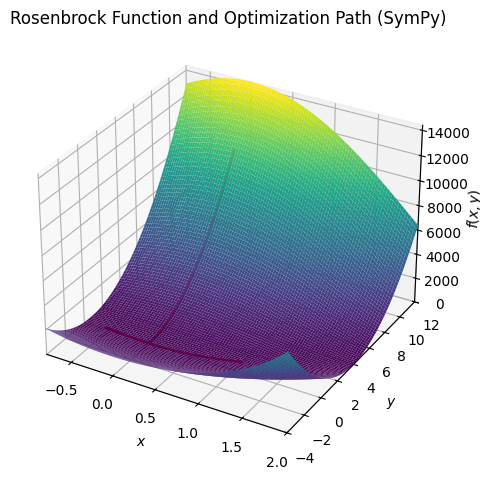

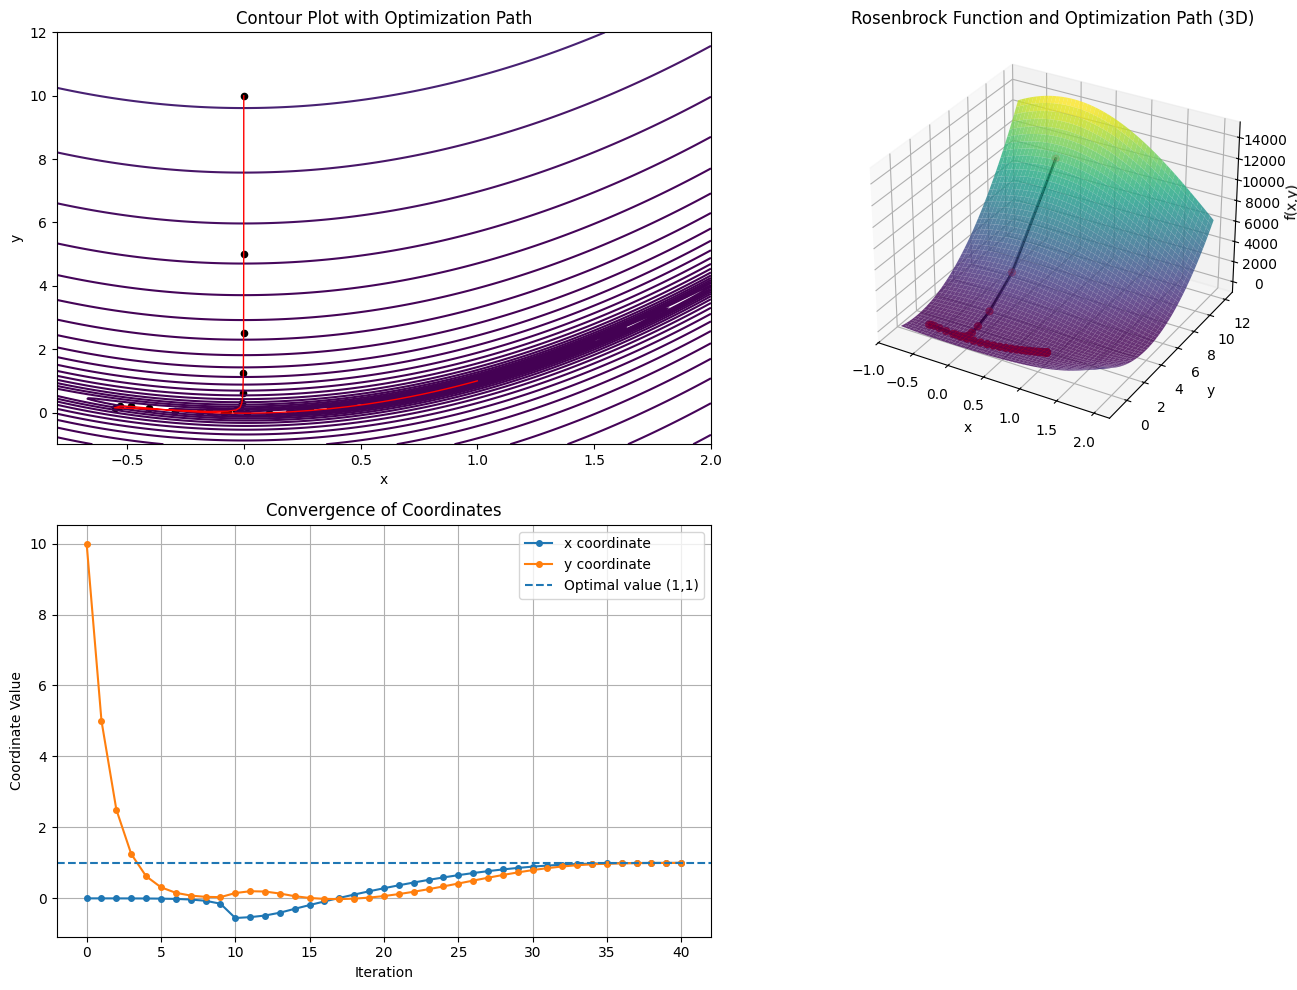

In [34]:
# Ejecutamos Newton-Raphson desde el punto inicial [0, 10]
history, final_point, final_value, point_type = newton_raphson_2vars(f, x, y, [0, 10], alpha=0.5, max_iter=1000)

# Resultados finales
print(f"Punto final: {final_point}, Valor f: {final_value}, Tipo: {point_type}")
print(f"Número de iteraciones: {len(history)-1}")
print(f"\nConverge hacia el punto analítico (1,1)? --> {np.allclose(final_point,[1,1], atol=1e-2)}")


# Superficie base
p = plot3d(f, (x, -0.8, 2), (y, -4, 12), show=False,
           title='Rosenbrock Function and Optimization Path (SymPy)')

t = sp.symbols('t')

# Trayectoria como líneas y puntos
for (px, py), (px_next, py_next) in zip(history[:-1], history[1:]): 
    
    # Línea entre dos puntos
    line_plot = plot3d_parametric_line( 
        px + (px_next - px) * t, 
        py + (py_next - py) * t, 
        f.subs({x: px + (px_next - px) * t, 
                y: py + (py_next - py) * t}), 
        (t, 0, 1), show=False, line_color='red')
    
    p.append(line_plot[0])

# Añadir puntos como pequeños segmentos (t sin rango)
for px, py in history:
    point_plot = plot3d_parametric_line(px, py, f.subs({x: px, y: py}), 
                                        (t, 0, 0), show=False, line_color='black')
    p.append(point_plot[0])

p.show()


# Convertimos history a dos listas para gráficas
x_hist = history[:, 0]
y_hist = history[:, 1]


f_l = lambdify((x, y), f, "numpy")
X, Y = np.meshgrid(np.linspace(-0.8, 2, 400), np.linspace(-1, 12, 400))
Z = f_l(X, Y)
Z_hist = f_l(x_hist, y_hist)

#Figura con subplots en 2 columnas y 2 filas
fig = plt.figure(figsize=(14, 10)) 
gs = fig.add_gridspec(2, 2)

# Subplot 1 (Contour Plot)
ax1 = fig.add_subplot(gs[0, 0])
cs = ax1.contour(X, Y, Z, levels=np.logspace(-1, 5, 30))
ax1.plot(x_hist, y_hist, color='red', linewidth=1)
ax1.scatter(x_hist, y_hist, color='black', s=20)
ax1.set_title('Contour Plot with Optimization Path')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Subplot 2 (Superficie 3D)
ax2 = fig.add_subplot(gs[0, 1], projection='3d')
ax2.plot_surface(X, Y, Z, alpha=0.8, cmap='viridis')
ax2.plot(x_hist, y_hist, Z_hist, color='black', linewidth=2)
ax2.scatter(x_hist, y_hist, Z_hist, color='red', s=25)
ax2.set_title('Rosenbrock Function and Optimization Path (3D)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x,y)')

# Subplot 3 (Convergencia de Coordenadas)
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(x_hist, label='x coordinate', marker='o', markersize=4)
ax3.plot(y_hist, label='y coordinate', marker='o', markersize=4)
ax3.axhline(1, linestyle='--', label='Optimal value (1,1)')
ax3.set_title('Convergence of Coordinates')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Coordinate Value')
ax3.legend()
ax3.grid()


plt.tight_layout()
plt.show()

## Problema 3B: Función en 4D
Encontraremos minimos globales con Newton-Raphson adaptado a multiples dimensiones

In [ ]:
# Funcion auxioliar para el problema 3B
def print_function_analysis(f, symbols, grad, hess):
    """
     Imprime el análisis simbólico de una función en Rn, incluyendo la función, su gradiente, puntos críticos y Hessiana.
    """
    print("=== Resultados del análisis simbólico ===\n")

    print("Función:")
    sp.pprint(f)

    print("\nGradiente:")
    for g, s in zip(grad, symbols):
        print(f"∇f({s}) =", g)
    
    print("\nPuntos críticos:")
    critical_points = solve(grad, symbols)
    print(critical_points)

    print("\nValor punto Análitico:")
    f_expr = lambdify(symbols, f, 'numpy')
    print(f"∇f(x*) = {f_expr(*[critical_points[s] for s in symbols])}")
    

    print("\nHessiana:")
    sp.pprint(hess)

def newton_raphson_nDimension(f, symbols, x0, alpha=1.0, tol=1e-6, max_iter=100):
    """
    Implementación del método de Newton-Raphson para optimización en n dimensiones.

    Parametros:
      f: función objetivo (sympy expression)
      symbols: variables de la función (tuple of sympy symbols)
      x0: punto inicial (list or np.array)
      alpha: factor de paso (float)
      tol: tolerancia para el criterio de parada (float)
      max_iter: número máximo de iteraciones (int)

    Retorna:
      solution: punto óptimo encontrado (np.array)
      f_value: valor de la función en el punto óptimo (float)
      iterations: número de iteraciones realizadas (int)
      converged: si el algoritmo convergió (bool)
      trajectory: lista de puntos visitados durante la optimización (list of np.array)
      point_type: tipo de punto crítico (str)
    """
    
    # Cálculo de gradiente y Hessiana
    grad, hess = grad_hess_calc(f, symbols)

    # Preparacion algorimto 
    f_l = lambdify(symbols, f, 'numpy')
    grad_l = [lambdify(symbols, g, 'numpy') for g in grad]
    hess_l = lambdify(symbols, hess, 'numpy')

    convergence = False

    # Inicio algoritmo - k0 = punto actual
    xk = np.array(x0, dtype=float)
    trajectory = [xk.copy()]

    # Repetimos hasta convergencia o max_iter
    for k in range(max_iter):

        # Calculo gradiente y Hessiana en xk
        grad_k = np.array([g(*xk) for g in grad_l], dtype=float)
        hess_k = np.array(hess_l(*xk), dtype=float)

        # Criterio de parada utilizando norma del gradiente
        grad_norm = np.linalg.norm(grad_k)
        if grad_norm < tol:
            # Si cumple criterio de parada TERMINAMOS
            convergence = True
            break
        
        # Cálculo del paso pk - Revisamos si Hessiana es invertible
        try:
            hess_inv = np.linalg.inv(hess_k)
        except np.linalg.LinAlgError:
            print("Hessiana singular en iteración", k)
            break
        
        # Cálculo del paso
        pk = -hess_inv @ grad_k

        # Actualización de la solución
        xk += alpha * pk
        trajectory.append(xk.copy())
    
    # Evaluar tipo de punto crítico
    hess_final = np.array(hess_l(*xk), dtype=float)
    eigenvalues = np.linalg.eigvals(hess_final)
    if np.all(eigenvalues > 0):
        point_type = "Mínimo local"
    elif np.all(eigenvalues < 0):
        point_type = "Máximo local"
    else:
        point_type = "Punto de silla"

    return {
        'solution': xk,
        'f_value': f_l(*xk),
        'iterations': k+1,
        'converged': convergence,
        'trajectory': trajectory,
        'point_type': point_type
    }

def print_optimization_results(result):
    """
    Imprime los resultados de la optimización.
    """
    print("\n=== Resultados de la optimización ===\n")
    print(f"Punto óptimo encontrado: {result['solution']}")
    print(f"Valor de la función en el punto óptimo: {result['f_value']}")
    print(f"Número de iteraciones realizadas: {result['iterations']}")
    print(f"Convergió: {'Sí' if result['converged'] else 'No'}")
    print(f"Tipo de punto crítico: {result['point_type']}")

# Funciones de visualización para el problema 3B

def plot_trajectory_3d(trajectory, solution):
    """
    Grafica la trayectoria del método Newton-Raphson en 3D junto con el punto final
    y proyecciones en planos XY, YZ y XZ.
    
    trajectory: lista de puntos [x, y, z]
    solution: punto final (np.array)
    """
    traj = np.array(trajectory)

    fig = plt.figure(figsize=(14,10))

    # Gráfico 3D
    ax = fig.add_subplot(2, 2, 1, projection='3d')
    ax.plot(traj[:,0], traj[:,1], traj[:,2], marker='o', label='Trayectoria')
    ax.scatter(solution[0], solution[1], solution[2], color='red', s=80, label='Punto final')
    ax.set_title('Trayectoria en 3D')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend()

    # Proyección x-y
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.plot(traj[:,0], traj[:,1], marker='o')
    ax2.scatter(solution[0], solution[1], color='red', s=80)
    ax2.set_title('Proyección en plano x-y')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

    # Proyección y-z
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.plot(traj[:,1], traj[:,2], marker='o')
    ax3.scatter(solution[1], solution[2], color='red', s=80)
    ax3.set_title('Proyección en plano y-z')
    ax3.set_xlabel('y')
    ax3.set_ylabel('z')

    # Proyección x-z
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.plot(traj[:,0], traj[:,2], marker='o')
    ax4.scatter(solution[0], solution[2], color='red', s=80)
    ax4.set_title('Proyección en plano x-z')
    ax4.set_xlabel('x')
    ax4.set_ylabel('z')

    plt.tight_layout()
    plt.show()

def plot_function_3d_projections(f, symbols, solution, ranges):
    """
    Visualiza f(x,y,z0), f(x,z,y0), f(y,z,x0) como superficies 3D.

    f: función objetivo
    symbols: variables de la función (tuple of sympy symbols)
    solution: np.array([x*, y*, z*]) punto óptimo encontrado
    ranges: diccionario con rangos para x,y,z. Ej: {'x': (-2,4), 'y': (0,5), 'z': (1,6)}
    """
    f_l = lambdify(symbols, f, 'numpy')
    x_star, y_star, z_star = solution

    # Crear vectores de puntos
    x_vals = np.linspace(ranges['x'][0], ranges['x'][1], 50)
    y_vals = np.linspace(ranges['y'][0], ranges['y'][1], 50)
    z_vals = np.linspace(ranges['z'][0], ranges['z'][1], 50)

    fig = plt.figure(figsize=(16,12))

    # 1) f(x,y,z*)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z1 = f_l(X, Y, z_star)
    ax1 = fig.add_subplot(2,2,1, projection='3d')
    ax1.plot_surface(X, Y, Z1, alpha=0.7, edgecolor='none')
    ax1.scatter(x_star, y_star, f_l(x_star,y_star,z_star), color='red', s=80)
    ax1.set_title(f"Superficie f(x,y,z={z_star:.2f})")
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('f')

    # 2) f(x,z,y*)
    X, Z = np.meshgrid(x_vals, z_vals)
    Z2 = f_l(X, y_star, Z)
    ax2 = fig.add_subplot(2,2,2, projection='3d')
    ax2.plot_surface(X, Z, Z2, alpha=0.7, edgecolor='none')
    ax2.scatter(x_star, z_star, f_l(x_star,y_star,z_star), color='red', s=80)
    ax2.set_title(f"Superficie f(x,z,y={y_star:.2f})")
    ax2.set_xlabel('x')
    ax2.set_ylabel('z')
    ax2.set_zlabel('f')

    # 3) f(y,z,x*)
    Y, Z = np.meshgrid(y_vals, z_vals)
    Z3 = f_l(x_star, Y, Z)
    ax3 = fig.add_subplot(2,2,3, projection='3d')
    ax3.plot_surface(Y, Z, Z3, alpha=0.7, edgecolor='none')
    ax3.scatter(y_star, z_star, f_l(x_star,y_star,z_star), color='red', s=80)
    ax3.set_title(f"Superficie f(y,z,x={x_star:.2f})")
    ax3.set_xlabel('y')
    ax3.set_ylabel('z')
    ax3.set_zlabel('f')

    plt.tight_layout()
    plt.show()

def plot_function_1d_slices(f, symbols, solution, ranges):
    """
    Genera las gráficas 1D:
    1) f(x, y*, z*) vs x
    2) f(x*, y, z*) vs y
    3) f(x*, y*, z) vs z
    """
    f_l = lambdify(symbols, f, 'numpy')
    x_star, y_star, z_star = solution

    # Valores para cada variable
    x_vals = np.linspace(ranges['x'][0], ranges['x'][1], 200)
    y_vals = np.linspace(ranges['y'][0], ranges['y'][1], 200)
    z_vals = np.linspace(ranges['z'][0], ranges['z'][1], 200)

    # Evaluación para las curvas
    f_x = f_l(x_vals, y_star, z_star)
    f_y = f_l(x_star, y_vals, z_star)
    f_z = f_l(x_star, y_star, z_vals)

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # 1) f(x, y*, z*)
    axs[0].plot(x_vals, f_x, label='f(x, y*, z*)')
    axs[0].scatter(x_star, f_l(x_star, y_star, z_star), color='red', s=80, label='Óptimo')
    axs[0].set_title('f(x, y*, z*) vs x')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('f')
    axs[0].legend()
    axs[0].grid()

    # 2) f(x*, y, z*)
    axs[1].plot(y_vals, f_y, label='f(x*, y, z*)')
    axs[1].scatter(y_star, f_l(x_star, y_star, z_star), color='red', s=80)
    axs[1].set_title('f(x*, y, z*) vs y')
    axs[1].set_xlabel('y')
    axs[1].set_ylabel('f')
    axs[1].legend()
    axs[1].grid()

    # 3) f(x*, y*, z)
    axs[2].plot(z_vals, f_z, label='f(x*, y*, z)')
    axs[2].scatter(z_star, f_l(x_star, y_star, z_star), color='red', s=80)
    axs[2].set_title('f(x*, y*, z) vs z')
    axs[2].set_xlabel('z')
    axs[2].set_ylabel('f')
    axs[2].legend()
    axs[2].grid()

    plt.tight_layout()
    plt.show()

def plot_f_vs_components(f, symbols, trajectory):
    """
    f: función objetivo
    symbols: variables de la función (tuple of sympy symbols)
    trajectory: lista de arrays con forma [x_k, y_k, z_k.......] en cada iteración
    """
    f_l = lambdify(symbols, f, 'numpy')
    # Convertimos trayectoria a NumPy para manipulación más fácil
    traj = np.array(trajectory)  # shape -> (n_iter, 3)
    
    # Separamos componentes
    x_vals = traj[:, 0]
    y_vals = traj[:, 1]
    z_vals = traj[:, 2]
    
    # Evaluamos f en cada punto de la trayectoria
    f_vals = np.array([f_l(x, y, z) for x, y, z in traj])
    
    # Creamos figura
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # 1) f vs x
    axs[0].plot(x_vals, f_vals, marker='o')
    axs[0].set_title('f(x_k, y_k, z_k) vs x_k')
    axs[0].set_xlabel('x_k')
    axs[0].set_ylabel('f(x_k, y_k, z_k)')
    axs[0].grid()

    # 2) f vs y
    axs[1].plot(y_vals, f_vals, marker='o')
    axs[1].set_title('f(x_k, y_k, z_k) vs y_k')
    axs[1].set_xlabel('y_k')
    axs[1].set_ylabel('f(x_k, y_k, z_k)')
    axs[1].grid()

    # 3) f vs z
    axs[2].plot(z_vals, f_vals, marker='o')
    axs[2].set_title('f(x_k, y_k, z_k) vs z_k')
    axs[2].set_xlabel('z_k')
    axs[2].set_ylabel('f(x_k, y_k, z_k)')
    axs[2].grid()

    plt.tight_layout()
    plt.show()



In [40]:
x, y, z = symbols('x y z')
f = (x-1)**2 + (y-2)**2 + (z-3)**2

grad, hess = grad_hess_calc(f, (x, y, z))

critical_points = solve(grad, [x, y, z])

print_function_analysis(f, (x, y, z), grad, hess)

=== Resultados del análisis simbólico ===

Función:
       2          2          2
(x - 1)  + (y - 2)  + (z - 3) 

Gradiente:
∇f(x) = 2*x - 2
∇f(y) = 2*y - 4
∇f(z) = 2*z - 6

Puntos críticos:
{x: 1, y: 2, z: 3}

Valor punto Análitico:
∇f(x*) = 0

Hessiana:
⎡2  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  2⎦



=== Resultados de la optimización ===

Punto óptimo encontrado: [0.99995806 2.00012583 3.0002936 ]
Valor de la función en el punto óptimo: 1.0379389766210352e-07
Número de iteraciones realizadas: 12
Convergió: Sí
Tipo de punto crítico: Mínimo local

Trayectoria 3D y proyecion:


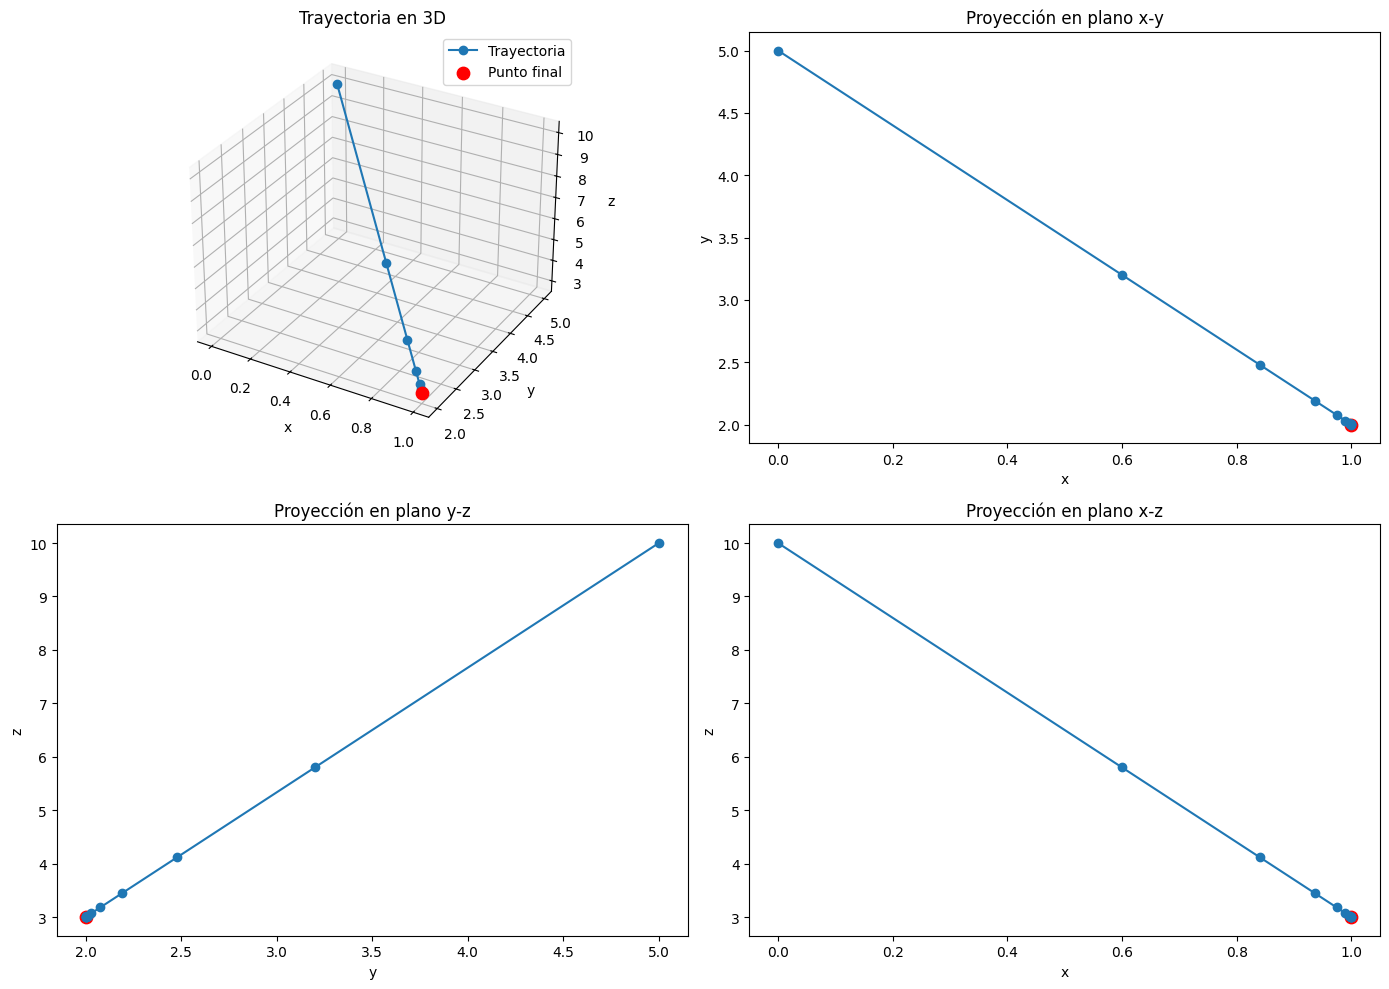


Superfiicies 3D dado X*:


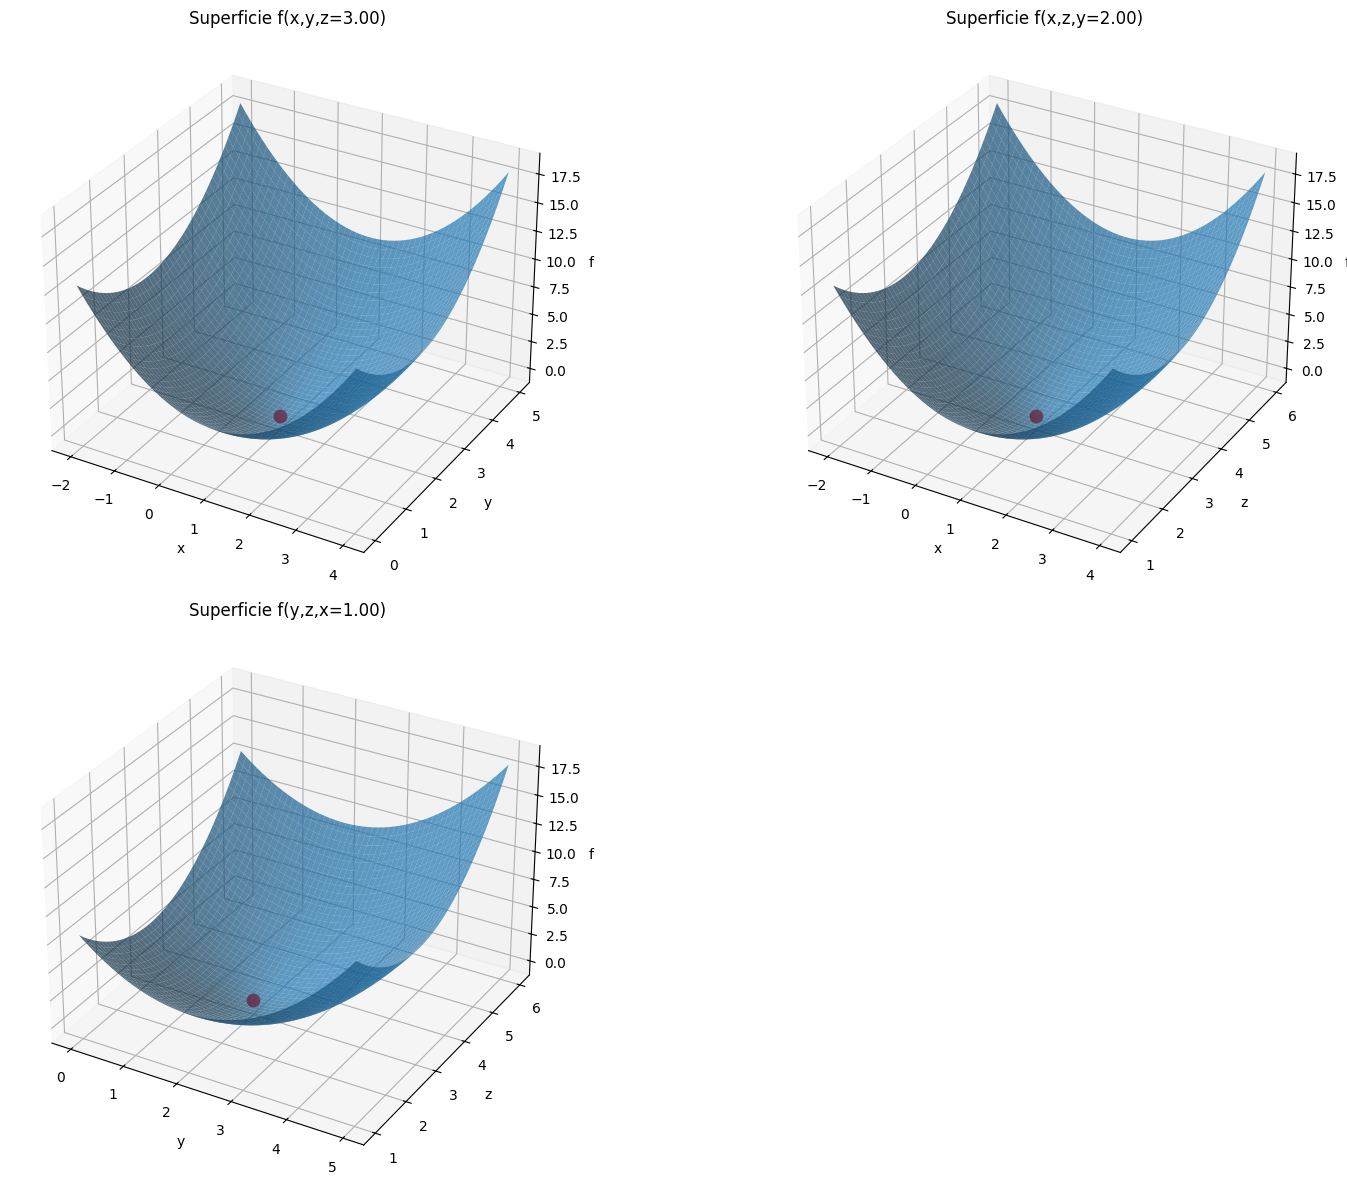


Slices 1D dado X*:


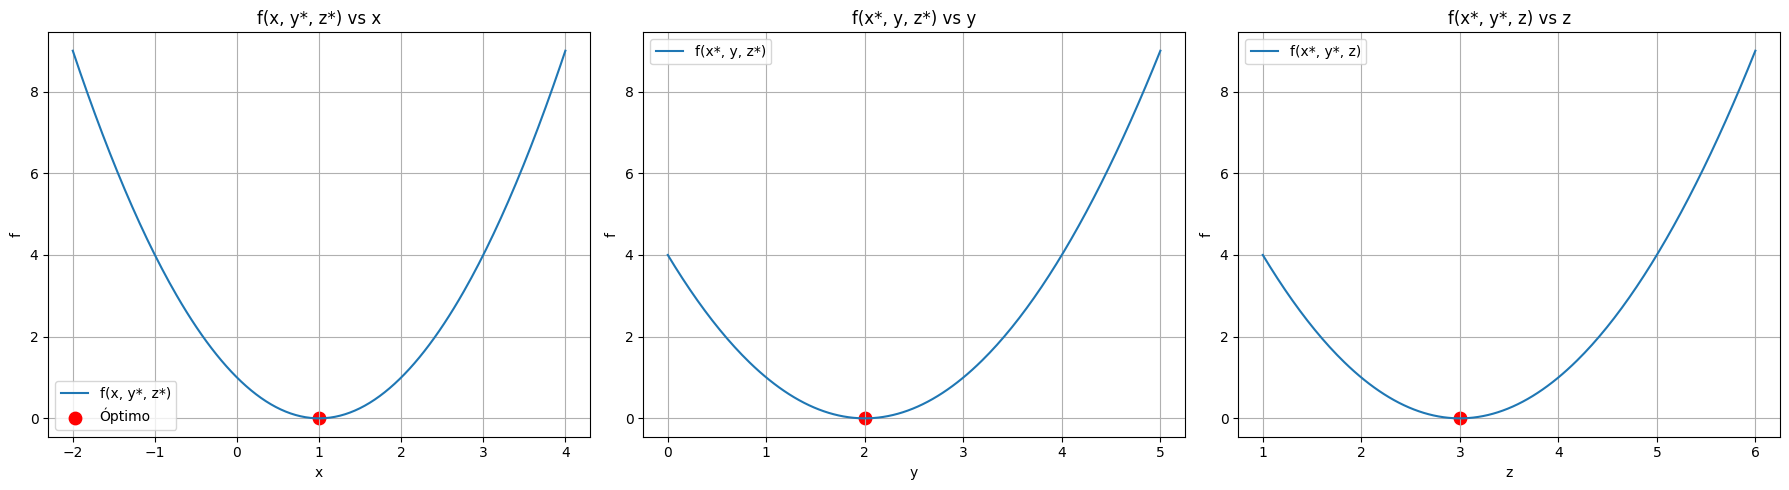


Componentes vs f(x):


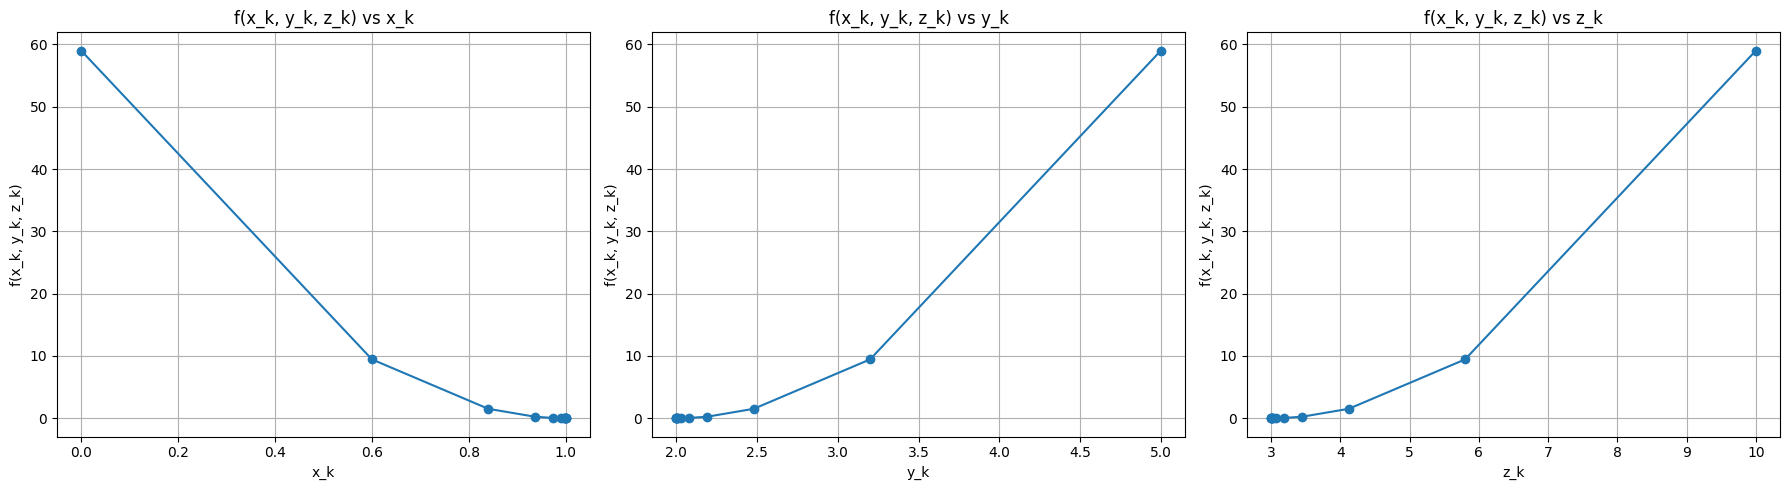

In [41]:
result = newton_raphson_nDimension(f, (x, y, z), [0, 5, 10], alpha=0.6, tol=1e-3)
print_optimization_results(result)
print("\nTrayectoria 3D y proyecion:")
plot_trajectory_3d(result['trajectory'], result['solution'])
print("\nSuperfiicies 3D dado X*:")
plot_function_3d_projections(f, (x, y, z), result['solution'], {'x': (-2,4), 'y': (0,5), 'z': (1,6)})
print("\nSlices 1D dado X*:")
plot_function_1d_slices(f, (x, y, z), result['solution'], {'x': (-2,4), 'y': (0,5), 'z': (1,6)})
print("\nComponentes vs f(x):")
plot_f_vs_components(f, (x, y, z), result['trajectory'])

## Interpretación de las gráficas de convergencia y comportamiento de la función

Con el objetivo de comprender de manera visual cómo evoluciona el método de Newton-Raphson en un espacio de dimensión 3 ($ \mathbb{R}^3 $), se desarrollaron diferentes tipos de gráficas que permiten analizar:

1. **La trayectoria del algoritmo en el espacio tridimensional.**
2. **El comportamiento de la función objetivo en cada plano relevante (proyecciones 2D y superficies 3D).**
3. **La influencia individual de cada componente ($x_k, y_k, z_k$) en el valor de la función durante la iteración.**


### 1. `plot_trajectory_3d(...)`: Trayectoria del método en el espacio y sus proyecciones

Este gráfico muestra cómo se desplaza el algoritmo en el espacio tridimensional desde el punto inicial hasta el punto óptimo.

- La curva en 3D representa la **trayectoria iterativa de Newton-Raphson**.
- El punto rojo indica la **solución final** encontrada.
- Se incluyen además proyecciones en los planos:
  -  Plano **X-Y** → cómo evoluciona el movimiento visto desde arriba.
  -  Plano **Y-Z** → variación entre eje vertical y profundidad.
  -  Plano **X-Z** → relación entre dirección horizontal y profundidad.

Estas proyecciones permiten comprender si alguna variable domina la convergencia o si los desplazamientos son equilibrados.


### 2. `plot_function_3d_projections(...)`: Superficies de la función fijando una variable

Aquí se analiza la forma de la función objetivo alrededor del óptimo en superficies 3D de la forma:

- $ f(x, y, z^*) $ → Plano donde se fija $z = z^*$.
- $ f(x, z, y^*) $ → Plano donde se fija $y = y^*$.
- $ f(y, z, x^*) $ → Plano donde se fija $x = x^*$.

Cada superficie incluye el **punto óptimo marcado en rojo**.

Esto permite visualizar cómo la función se comporta localmente como un valle o colina respecto a cada par de variables.


### 3. `plot_function_1d_slices(...)`: Cortes unidimensionales de la función

En estas gráficas se muestran cortes en 1D:

- $ f(x, y^*, z^*) $ variando solo $x$
- $ f(x^*, y, z^*) $ variando solo $y$
- $ f(x^*, y^*, z) $ variando solo $z$

Estas curvas son útiles para observar si el algoritmo converge siguiendo direcciones de máxima pendiente en cada eje.

Sirven como evidencia de que el punto final corresponde a un mínimo o máximo local en cada dirección.

### 4. `plot_f_vs_components(...)`: Evolución de $f(x_k, y_k, z_k)$ respecto a cada variable en la trayectoria

Esta función es muy similar a la 3, pero en este caso podemos ver como evoluciona la trayectoria del algoritmo, pues se grafican las trayectorias entre puntos del algoritmo, no como tal una curva. Esto permite ver como empieza a converger el algoritmo.



# Problema 4: Gradiente descendente en optimización

# Problema 5: Descenso de gradiente y descenso de gradiente basado en momento